In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv("VSRR_Provisional_Drug_Overdose_Death_Counts.csv") 
df.head()

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
0,AK,2015,January,12 month-ending,Cocaine (T40.5),NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
1,AK,2015,February,12 month-ending,Cocaine (T40.5),NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
2,AK,2015,March,12 month-ending,Cocaine (T40.5),NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
3,AK,2015,April,12 month-ending,Cocaine (T40.5),NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
4,AK,2015,May,12 month-ending,Cocaine (T40.5),NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN


In [3]:
print("Dataset shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nDataset info:\n")
df.info()

Dataset shape: (78120, 12)

Columns:
 Index(['State', 'Year', 'Month', 'Period', 'Indicator', 'Data Value',
       'Percent Complete', 'Percent Pending Investigation', 'State Name',
       'Footnote', 'Footnote Symbol', 'Predicted Value'],
      dtype='object')

Dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78120 entries, 0 to 78119
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          78120 non-null  object 
 1   Year                           78120 non-null  int64  
 2   Month                          78120 non-null  object 
 3   Period                         78120 non-null  object 
 4   Indicator                      78120 non-null  object 
 5   Data Value                     63827 non-null  float64
 6   Percent Complete               78120 non-null  int64  
 7   Percent Pending Investigation  78120 non-null  float64
 8   State Na

In [4]:
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)

Shape after removing duplicates: (78120, 12)


In [5]:
# Time feature preparation (Year already exists in the dataset)
df.columns = df.columns.str.strip()

df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Month"] = pd.to_numeric(df["Month"], errors="coerce")

df[["Year", "Month"]].head()

,Year,Month
0,2015,NaN
1,2015,NaN
2,2015,NaN
3,2015,NaN
4,2015,NaN


In [6]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.head()

,Year,Month,Data Value,Percent Complete,Percent Pending Investigation,Predicted Value
0,2015,NaN,NaN,100,0.0,NaN
1,2015,NaN,NaN,100,0.0,NaN
2,2015,NaN,NaN,100,0.0,NaN
3,2015,NaN,NaN,100,0.0,NaN
4,2015,NaN,NaN,100,0.0,NaN


In [7]:
print("Missing values before handling:\n")
print(df_numeric.isnull().sum())

df_numeric = df_numeric.fillna(df_numeric.mean(numeric_only=True))

print("\nMissing values after handling:\n")
print(df_numeric.isnull().sum())

Missing values before handling:

Year                                 0
Month                            78120
Data Value                       14293
Percent Complete                     0
Percent Pending Investigation        0
Predicted Value                  27634
dtype: int64

Missing values after handling:

Year                                 0
Month                            78120
Data Value                           0
Percent Complete                     0
Percent Pending Investigation        0
Predicted Value                      0
dtype: int64


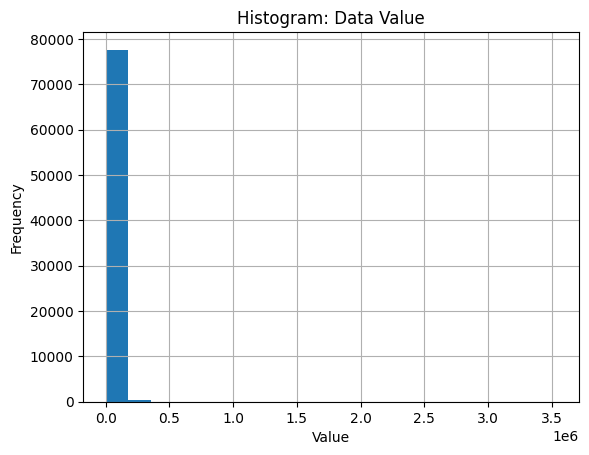

In [8]:
df_numeric["Data Value"].hist(bins=20)
plt.title("Histogram: Data Value")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

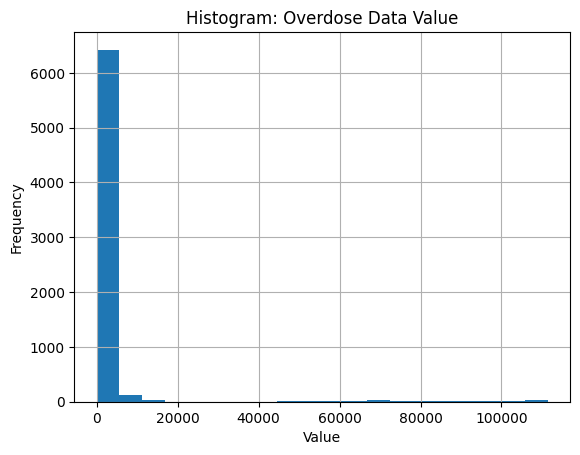

In [9]:
overdose_df = df[df["Indicator"].str.contains("overdose", case=False, na=False)]
overdose_df["Data Value"].hist(bins=20)
plt.title("Histogram: Overdose Data Value")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

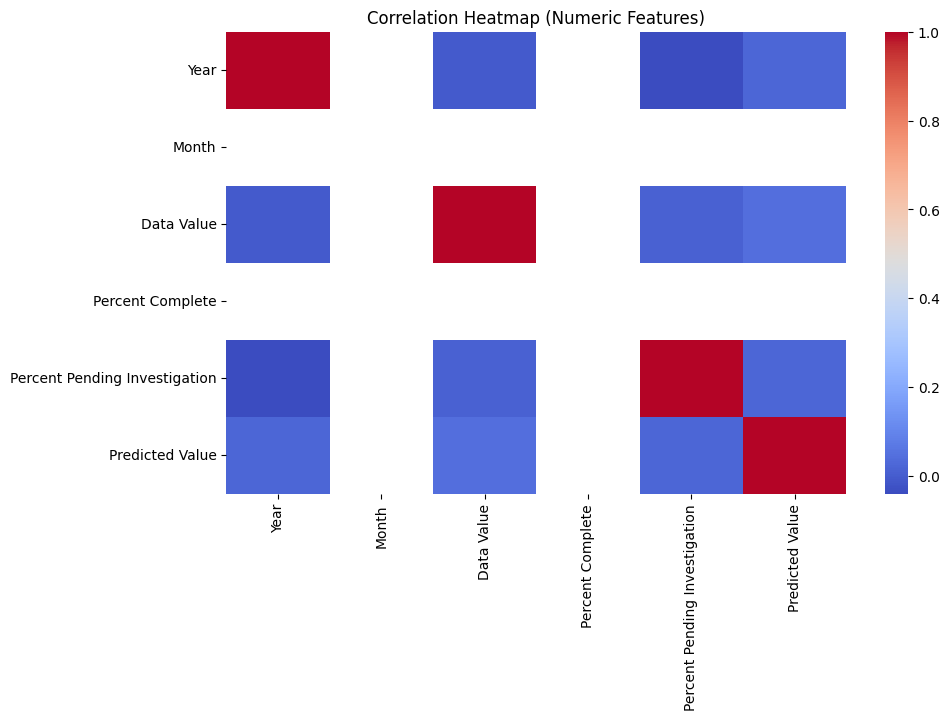

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [11]:
# Target variable (Y)
y = df_numeric["Data Value"]

# Features (X) - drop target column
X = df_numeric.drop(columns=["Data Value"])

print("X shape:", X.shape)
print("y shape:", y.shape)

X.head()

X shape: (78120, 5)
y shape: (78120,)


,Year,Month,Percent Complete,Percent Pending Investigation,Predicted Value
0,2015,NaN,100,0.0,1465.830131
1,2015,NaN,100,0.0,1465.830131
2,2015,NaN,100,0.0,1465.830131
3,2015,NaN,100,0.0,1465.830131
4,2015,NaN,100,0.0,1465.830131


In [12]:
overdose_df = df[df["Indicator"].str.contains("overdose", case=False, na=False)]

df_numeric_overdose = overdose_df.select_dtypes(include=[np.number]).fillna(overdose_df.select_dtypes(include=[np.number]).mean())

y = df_numeric_overdose["Data Value"]
X = df_numeric_overdose.drop(columns=["Data Value"])

print("X shape:", X.shape)
print("y shape:", y.shape)

X.head()

X shape: (6696, 5)
y shape: (6696,)


,Year,Month,Percent Complete,Percent Pending Investigation,Predicted Value
868,2015,NaN,100,0.0,126.0
869,2015,NaN,100,0.0,127.0
870,2015,NaN,100,0.0,125.0
871,2015,NaN,100,0.0,126.0
872,2015,NaN,100,0.0,125.0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (5356, 5)
Test shape: (1340, 5)


In [14]:
# Fill missing values using training set mean (safe)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed")

Feature scaling completed


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\extmath.py:1207: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\extmath.py:1212: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\extmath.py:1236: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [16]:
print(X_train.isnull().sum())

Year                                0
Month                            5356
Percent Complete                    0
Percent Pending Investigation       0
Predicted Value                     0
dtype: int64


In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# 1) Force numeric (non-numeric becomes NaN)
X_train = X_train.apply(pd.to_numeric, errors="coerce")
X_test  = X_test.apply(pd.to_numeric, errors="coerce")
y_train = pd.to_numeric(y_train, errors="coerce")
y_test  = pd.to_numeric(y_test, errors="coerce")
# 2) Drop rows where y_train is missing (keep X aligned)
mask = y_train.notna()
X_train = X_train.loc[mask].copy()
y_train = y_train.loc[mask].copy()
# 3) Replace infinity with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
# 4) Drop columns that are fully NaN in training set (example: Month)
all_nan_cols = X_train.columns[X_train.isna().all()]
X_train.drop(columns=all_nan_cols, inplace=True)
X_test.drop(columns=all_nan_cols, inplace=True)
# 5) Fill remaining NaN using training mean, then 0 (safe fallback)
train_means = X_train.mean()
X_train = X_train.fillna(train_means).fillna(0)
X_test  = X_test.fillna(train_means).fillna(0)
print("Dropped all-NaN columns:", list(all_nan_cols))
print("NaN left in X_train:", int(X_train.isna().sum().sum()))
print("NaN left in X_test :", int(X_test.isna().sum().sum()))
# 6) Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# 7) Train Models
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
lr_model.fit(X_train_scaled, y_train)
dt_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)

print("All models trained successfully!")

Dropped all-NaN columns: []
NaN left in X_train: 0
NaN left in X_test : 0
All models trained successfully!


In [33]:
import pickle

# Save models
pickle.dump(lr_model, open("lr_model.pkl", "wb"))
pickle.dump(dt_model, open("dt_model.pkl", "wb"))
pickle.dump(rf_model, open("rf_model.pkl", "wb"))

# Save scaler + features + means
pickle.dump(scaler, open("scaler.pkl", "wb"))
pickle.dump(X_train.columns.tolist(), open("feature_cols.pkl", "wb"))
pickle.dump(X_train.mean(), open("train_means.pkl", "wb"))

print("✅ Saved 3 models + scaler + feature files")


✅ Saved 3 models + scaler + feature files


In [26]:
lr_pred = lr_model.predict(X_test_scaled)
dt_pred = dt_model.predict(X_test_scaled)
rf_pred = rf_model.predict(X_test_scaled)

rf_pred[:10]

array([ 505.45, 1436.18, 4599.23,  107.05, 1070.68,  398.39, 1914.96,
       3692.27,  553.93,  146.01])

In [27]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(model_name)
    print("MAE :", mae)
    print("RMSE:", rmse)
    print("-" * 30)

evaluate_model(y_test, lr_pred, "Linear Regression")
evaluate_model(y_test, dt_pred, "Decision Tree Regression")
evaluate_model(y_test, rf_pred, "Random Forest Regression")

Linear Regression
MAE : 25.44594244375163
RMSE: 64.54199783034677
------------------------------
Decision Tree Regression
MAE : 20.030597014925373
RMSE: 106.20191624883881
------------------------------
Random Forest Regression
MAE : 12.85426119402982
RMSE: 66.7995448008217
------------------------------


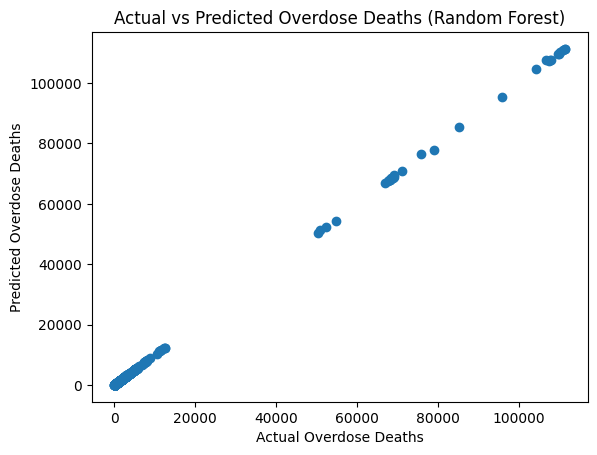

In [28]:
plt.figure()
plt.scatter(y_test, rf_pred)
plt.xlabel("Actual Overdose Deaths")
plt.ylabel("Predicted Overdose Deaths")
plt.title("Actual vs Predicted Overdose Deaths (Random Forest)")
plt.show()

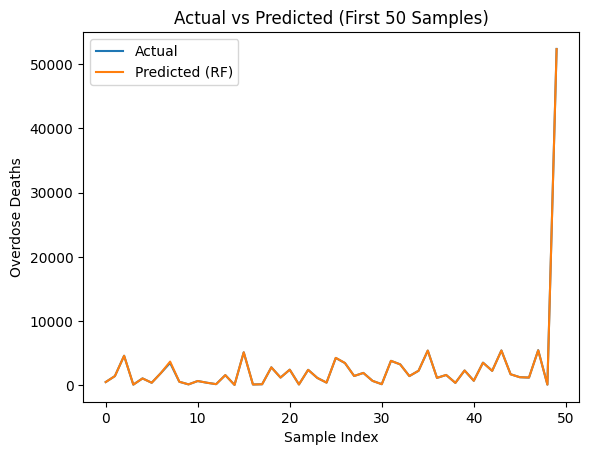

In [29]:
plt.figure()
plt.plot(y_test.values[:50], label="Actual")
plt.plot(rf_pred[:50], label="Predicted (RF)")
plt.title("Actual vs Predicted (First 50 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Overdose Deaths")
plt.legend()
plt.show()

In [30]:
# X_train, scaler, rf_model

feature_cols = list(X_train.columns)      # exact columns used in training
train_means = X_train.mean(numeric_only=True)

print("\n--- Predict Data Value for a new entry (Random Forest) ---")
print("Features required:", feature_cols)

# collect inputs only for columns that actually exist
user_input = {}

for col in feature_cols:
    # Month might be dropped in your training (you saw: Dropped all-NaN columns: ['Month'])
    # so it will NOT be asked if it's not in feature_cols.
    val = input(f"Enter value for {col}: ")
    user_input[col] = val

# Build dataframe in the SAME column order
new_df = pd.DataFrame([user_input], columns=feature_cols)

# Force numeric, handle bad values
new_df = new_df.apply(pd.to_numeric, errors="coerce")
new_df = new_df.replace([np.inf, -np.inf], np.nan)

# Fill missing using training mean (safe)
new_df = new_df.fillna(train_means)

# Scale using SAME scaler
new_scaled = scaler.transform(new_df)

# Predict
pred_value = rf_model.predict(new_scaled)[0]
print("\nPredicted Data Value (Random Forest):", pred_value)



--- Predict Data Value for a new entry (Random Forest) ---
Features required: ['Year', 'Percent Complete', 'Percent Pending Investigation', 'Predicted Value']

Predicted Data Value (Random Forest): 2929.72


In [31]:
overdose_df["Indicator"].value_counts().head(10)

Indicator
Number of Drug Overdose Deaths    6696
Name: count, dtype: int64

In [32]:
import pickle

with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("feature_cols.pkl", "wb") as f:
    pickle.dump(X_train.columns.tolist(), f)

with open("train_means.pkl", "wb") as f:
    pickle.dump(X_train.mean(), f)

print("✅ All files saved successfully!")

✅ All files saved successfully!
